In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import rcParams


# 配置Matplotlib使用支持中文的系统字体
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 替换为系统中存在的其他支持中文的字体
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 用pandas讀取檔案
mine_data = pd.read_csv(r"data\mine dataset.csv")
# 顯示數據集的前幾行，檢查是否正確讀取資料
print(mine_data.head())
print(mine_data.columns)

   Output voltage value of FLC sensor  \
0                            0.338157   
1                            0.320241   
2                            0.287009   
3                            0.256284   
4                            0.262840   

   The height of the sensor from the ground  Soil types  Mine types  
0                                  0.000000         0.0           1  
1                                  0.181818         0.0           1  
2                                  0.272727         0.0           1  
3                                  0.454545         0.0           1  
4                                  0.545455         0.0           1  
Index(['Output voltage value of FLC sensor',
       'The height of the sensor from the ground', 'Soil types', 'Mine types'],
      dtype='object')


In [4]:
X = mine_data[['Output voltage value of FLC sensor', 'The height of the sensor from the ground', 'Soil types']]  # 特徵
y = mine_data['Mine types']  # 目標

# 查看目標類別的分佈情況
print(y.value_counts())

x = mine_data.iloc[:,:-1]
y = mine_data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
clf = DecisionTreeClassifier(min_samples_split=4, random_state=1)

Mine types
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64


In [5]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3)
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3)

clf_gini.fit(x_train, y_train)
prediction_gini = clf_gini.predict(x_test)
clf_entropy.fit(x_train, y_train)
prediction_entropy = clf_entropy.predict(x_test)

In [6]:
print("Gini: \n", confusion_matrix(y_test, prediction_gini), classification_report(y_test, prediction_gini,zero_division=0))
print("Entropy: \n", confusion_matrix(y_test, prediction_entropy), classification_report(y_test, prediction_entropy,zero_division=0))

Gini: 
 [[14  0  0  1  0]
 [ 0 10  3  0  0]
 [ 4  4 10  0  0]
 [ 3  0  5  2  0]
 [ 4  1  7  0  0]]               precision    recall  f1-score   support

           1       0.56      0.93      0.70        15
           2       0.67      0.77      0.71        13
           3       0.40      0.56      0.47        18
           4       0.67      0.20      0.31        10
           5       0.00      0.00      0.00        12

    accuracy                           0.53        68
   macro avg       0.46      0.49      0.44        68
weighted avg       0.45      0.53      0.46        68

Entropy: 
 [[10  0  0  5  0]
 [ 0 12  0  0  1]
 [ 4  2  6  0  6]
 [ 3  0  4  2  1]
 [ 4  0  5  0  3]]               precision    recall  f1-score   support

           1       0.48      0.67      0.56        15
           2       0.86      0.92      0.89        13
           3       0.40      0.33      0.36        18
           4       0.29      0.20      0.24        10
           5       0.27      0.25      

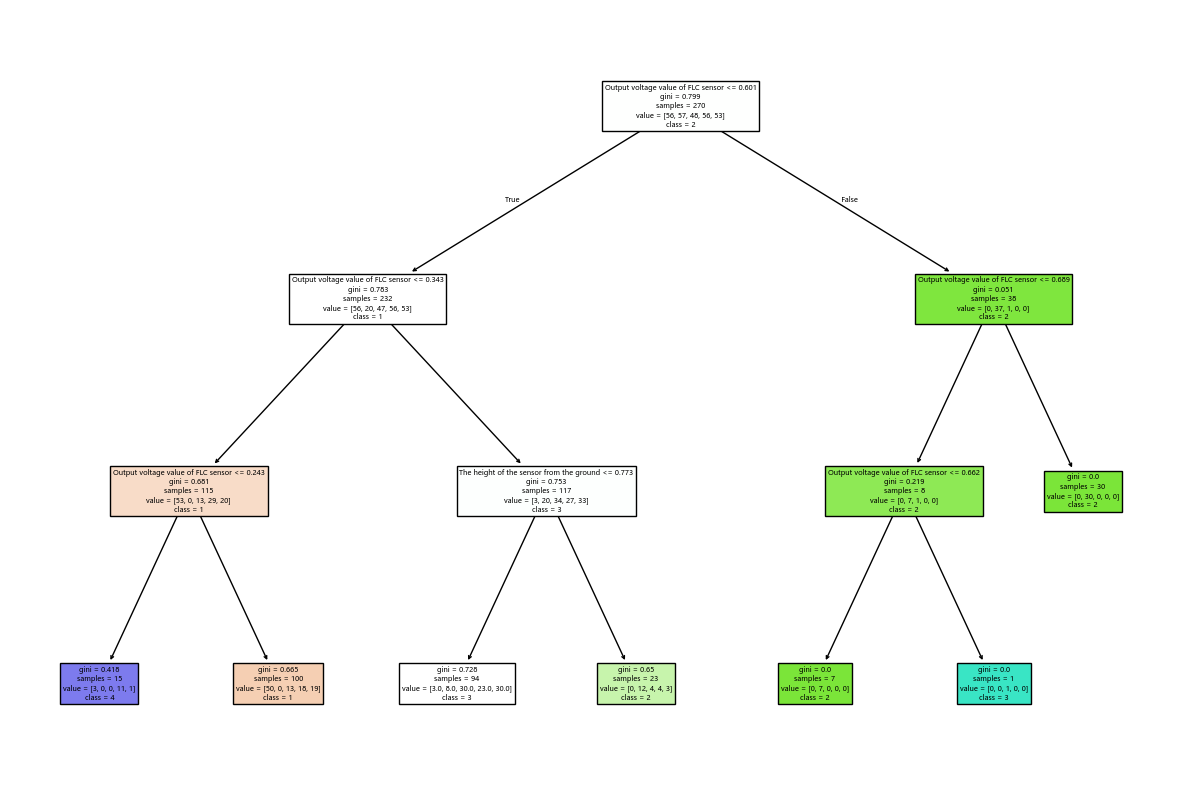

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_gini, 
                   feature_names=x_train.columns,  
                   class_names=y.unique().astype(str),
                   filled=True)
fig.savefig("gini.png")

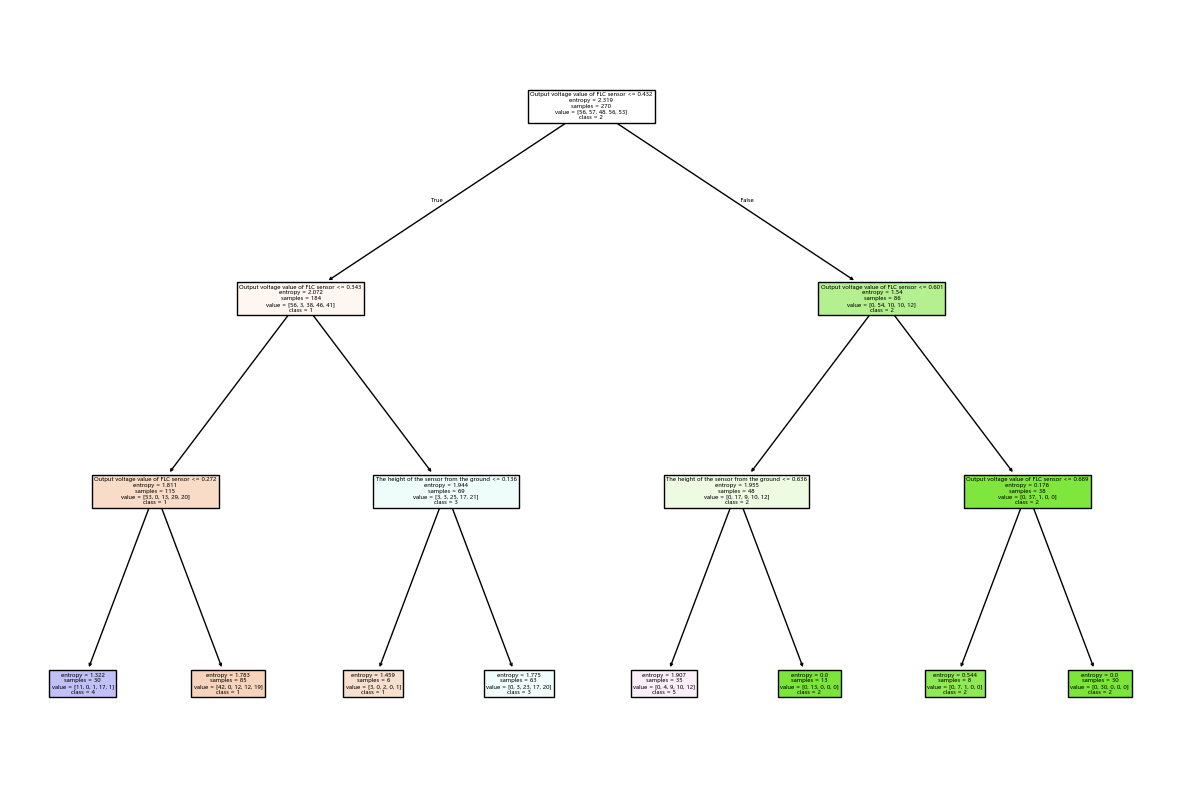

In [8]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=x_train.columns,  
                   class_names=y.unique().astype(str),
                   filled=True)
fig.savefig("entropy.png")

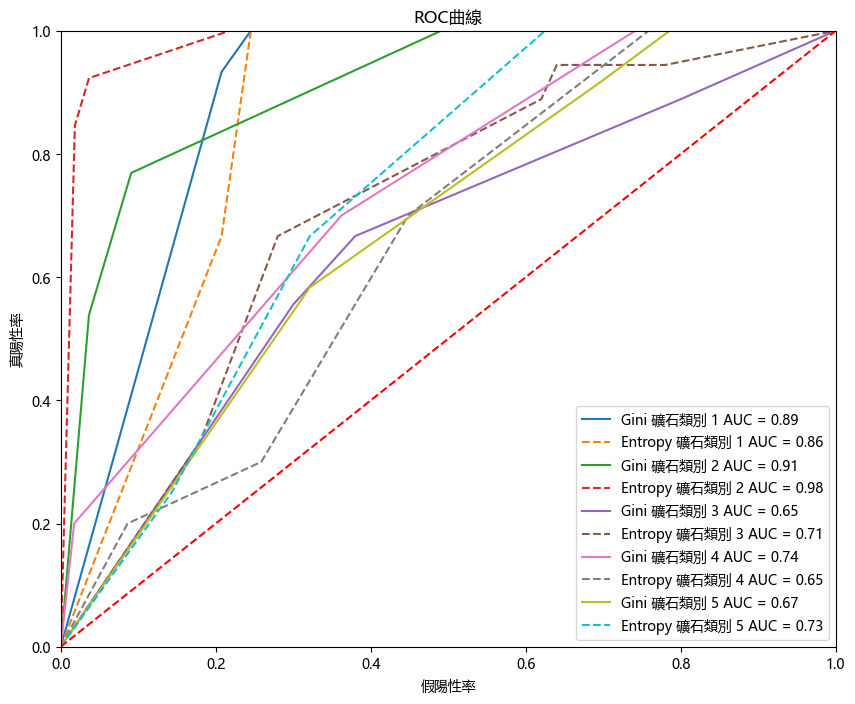

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# 將目標變量轉換為二進制格式（one-hot encoding）
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4,5])

# 獲取預測概率
probs_gini = clf_gini.predict_proba(x_test)
probs_entropy = clf_entropy.predict_proba(x_test)

# 繪製ROC曲線
plt.figure(figsize=(10, 8))

for i in range(y_test_bin.shape[1]):
    # 計算Gini的ROC曲線和AUC
    fpr_gini, tpr_gini, _ = roc_curve(y_test_bin[:, i], probs_gini[:, i])
    auc_gini = roc_auc_score(y_test_bin[:, i], probs_gini[:, i])
    
    # 計算Entropy的ROC曲線和AUC
    fpr_entropy, tpr_entropy, _ = roc_curve(y_test_bin[:, i], probs_entropy[:, i])
    auc_entropy = roc_auc_score(y_test_bin[:, i], probs_entropy[:, i])
    
    # 繪製ROC曲線
    plt.plot(fpr_gini, tpr_gini, label=f'Gini 礦石類別 {i+1} AUC = {auc_gini:.2f}')
    plt.plot(fpr_entropy, tpr_entropy, linestyle='--', label=f'Entropy 礦石類別 {i+1} AUC = {auc_entropy:.2f}')

# 繪製對角線（表示隨機分類器的表現）
plt.plot([0, 1], [0, 1], 'r--')


# 設置坐標軸範圍和標註
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('假陽性率')
plt.ylabel('真陽性率')
plt.title('ROC曲線')
plt.legend(loc='lower right')
plt.show()